# Problem Statement

To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is the sport which generate high revenue.
- What if the winner team of the match can be predicted before the match, even have begin?
- Because we are predicting a output which is categorical value, that is the probelm is a classification problem.

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [556]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [557]:
# load the datasets ODI_data_1971_2017 and ODI_data_2017_2021
data1 = pd.read_csv('/content/ODI-data-1971-2017.csv')
data2 = pd.read_csv('/content/ODI-Data-2017-2021.csv')

In [558]:
# ODI_data_1971_2017 data
data1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [559]:
# ODI_data_2017_2021 data
data2

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"
...,...,...,...,...,...,...,...,...
490,490,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
491,491,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
492,492,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
493,493,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [560]:
data2.drop('Unnamed: 0',axis = 1,inplace = True)

Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [561]:
# Droping rows with index range 0 to 116
data2.drop(data2.index[0:117],inplace = True)

In [562]:
# Reset index of the dataframe
data2 = data2.reset_index()

In [563]:
# Drop the extra 'index' column from dataframe
data2.drop('index',axis = 1,inplace = True)

In [564]:
data2

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 3934,P.N.G.,Scotland,Scotland,4 wickets,Dubai (DSC),"Nov 25, 2017"
1,ODI # 3935,Afghanistan,Ireland,Afghanistan,138 runs,Sharjah,"Dec 5, 2017"
2,ODI # 3936,Hong Kong,P.N.G.,Hong Kong,23 runs,ICCA Dubai,"Dec 6, 2017"
3,ODI # 3937,Afghanistan,Ireland,Ireland,51 runs,Sharjah,"Dec 7, 2017"
4,ODI # 3938,Hong Kong,P.N.G.,Hong Kong,93 runs,ICCA Dubai,"Dec 8, 2017"
...,...,...,...,...,...,...,...
373,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
374,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
375,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
376,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [565]:
data1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [566]:
# Load ODI_data_1971_2021 the dataset
data1 = pd.concat([data1,data2],axis = 0)

In [567]:
# ODI_data_1971_2021 data
data1

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
373,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
374,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
375,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
376,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [568]:
data1.reset_index(inplace = True)

In [569]:
# Drop values from 0 to 2936 as it all conten samples of before year 2010
# Store all remaining smaple in new dataframe
data1.drop(['index'],axis = 1,inplace = True)
sample = data1.drop(data1.index[0:2936])

In [570]:
#Sample Dataframe
sample.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
2936,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
2937,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2938,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
2939,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
2940,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


In [571]:
# Reset index of the new dataframe
sample = sample.reset_index()

In [572]:
sample.head()

,index,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,2936,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,2937,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,2938,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,2939,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,2940,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


In [573]:
# Remove extra 'index' Column from ew dataframe 
sample.drop('index',axis = 1,inplace = True)

In [574]:
# ODI_data_2010_2021 data
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1369,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1370,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1371,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1372,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [575]:
# Check all column names
sample.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [576]:
# Check info of complete dataset
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1374 non-null   object
 1   Team 1      1374 non-null   object
 2   Team 2      1374 non-null   object
 3   Winner      1374 non-null   object
 4   Margin      1325 non-null   object
 5   Ground      1374 non-null   object
 6   Match Date  1374 non-null   object
dtypes: object(7)
memory usage: 75.3+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [577]:
# For more information on the dataset like the total count in all the columns
sample.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1374,1374,1374,1374,1325,1374,1374
unique,1374,23,23,25,213,124,1149
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Mar 6, 2018"
freq,1,141,175,164,125,87,4


## Get the total number of samples in the dataset using the len() function

In [578]:
# print len of the datset 
print('ODI Dataset length is ',len(sample))

ODI Dataset length is  1374


## Get unique values

In [579]:
# loop through datatset to find count of unique values of each column
sample.nunique()

Scorecard     1374
Team 1          23
Team 2          23
Winner          25
Margin         213
Ground         124
Match Date    1149
dtype: int64

## Counting the total number of missing values

In [580]:
# Check for missing values in all the columnns of the dataset
sample.isna().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

In [581]:
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1369,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1370,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1371,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1372,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [582]:
#Categorical columns list
categorical_cols = [i for i in sample.columns]
categorical_cols

['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date']

In [583]:
# Import necessary libraries needed for performing Chi-square test
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Helper function for performing chi-square test
def PerformChiSquare(var1, var2):
  #Crosstab from pandas
  crosstab = pd.crosstab(sample[var1],sample[var2])
  contingency_table = chi2_contingency(crosstab,correction = False)

    
    #Contingency Table ===> already it is been implemented above
  
    
    #Observed Values
    
    
    #Expected Values
    
    #Degree of Freedom
  no_of_rows = crosstab.shape[0]
  no_of_cols = crosstab.shape[1]

  DegreeOfFreedom = (no_of_rows - 1)*(no_of_cols - 1)
  print("Degrees of Freedom is ",DegreeOfFreedom)
    
    #Significance Level 5%
  alpha = 0.05
  print("The Significance Level is ",alpha)
    
    
    #chi-square statistic
  chi_square = contingency_table[0]
  chi_square_statistic = chisquare(crosstab,contingency_table[3])[0].max()
  print("Chi-sqaure statistic is ",chi_square_statistic)
    
    #critical_value
  critical_value = chi2.ppf(q = alpha,df = DegreeOfFreedom)
  print("The Critical value is ",critical_value)
    
    #p-value
  p_value = contingency_table[1]
  print("The P_Value is ",p_value)

   
    # check condition based on chi_square_statistic and critical value for hypothesis rejection     
  if chi_square_statistic >= critical_value:
    print("Reject Null-Hypothesis, There is a relationship between the 2 categorical variables compared")  
  else:
    print("Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared")
     
    # check condition based on p value and alpha for hypothesis rejection  
  if p_value <= alpha:
    print("Reject Null-Hypothesis, There is a relationship between the 2 categorical variables compared")
  else:
    print("Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared")
    

In [584]:
# looping on whole dataset for performing chi-square test
for col1 in range(len(sample.columns)):
    # Inner loop on whol edataset columns name
    for col2 in range(col1+1,len(sample.columns)):    
        # checking condition that both column names are should not be equal
        if col1 != col2:
          # passing both column names to chi-sqaure performance function
          print('The columns under test are : {} and {}'.format(categorical_cols[col1],categorical_cols[col2]))
          PerformChiSquare(categorical_cols[col1],categorical_cols[col2])
          print('\n')

The columns under test are : Scorecard and Team 1
Degrees of Freedom is  30206
The Significance Level is  0.05
Chi-sqaure statistic is  1369.9999999999932
The Critical value is  29802.854068039473
The P_Value is  0.4632702377321118
Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared
Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared


The columns under test are : Scorecard and Team 2
Degrees of Freedom is  30206
The Significance Level is  0.05
Chi-sqaure statistic is  1371.000000000001
The Critical value is  29802.854068039473
The P_Value is  0.4632702377321118
Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared
Reject Null-Hypothesis, There is no relationship between the 2 categorical variables compared


The columns under test are : Scorecard and Winner
Degrees of Freedom is  32952
The Significance Level is  0.05
Chi-sqaure statistic is  1369.000000000111
The

From above chi-square test:

There is correlation between Team 1 and Winner data.

## groupby

You can use groupby to chunk up your data into subsets for further analysis.

<Figure size 864x576 with 0 Axes>

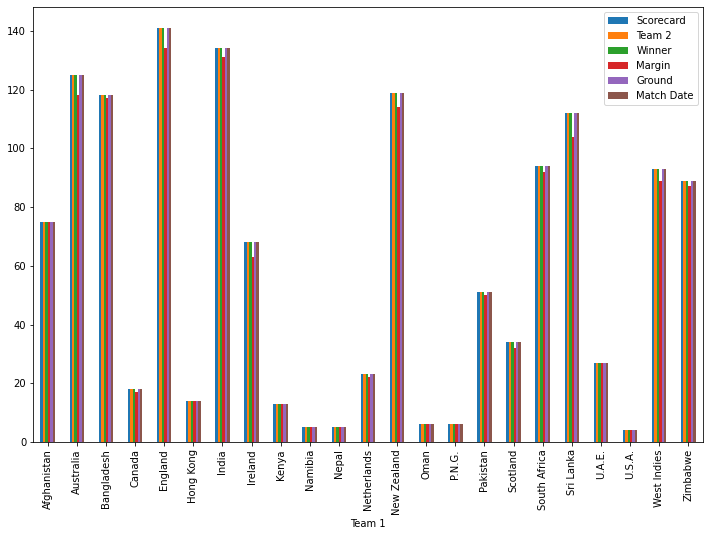

In [585]:
from numpy.core.fromnumeric import size
# group data by Team 1 and plot count plot
plt.figure(figsize = (12,8))
sample.groupby(['Team 1']).count().plot(kind = 'bar',figsize = (12,8))

from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

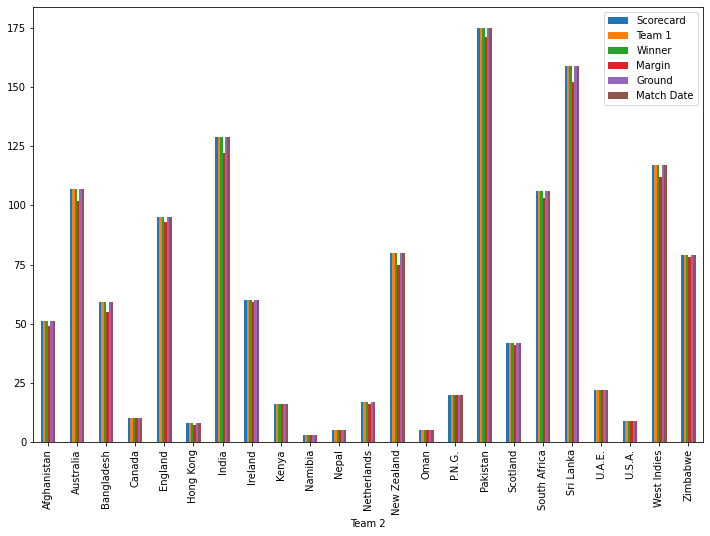

In [586]:
# group data by Team 2 and plot count plot
sample.groupby(['Team 2']).count().plot(kind = 'bar',figsize = (12,8))

from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

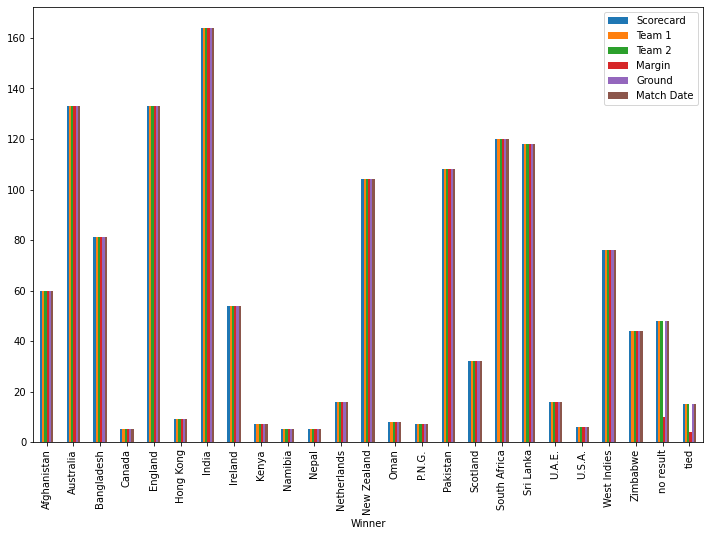

In [587]:
# group data by Winner and plot count plot
sample.groupby(['Winner']).count().plot(kind = 'bar',figsize = (12,8))

from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

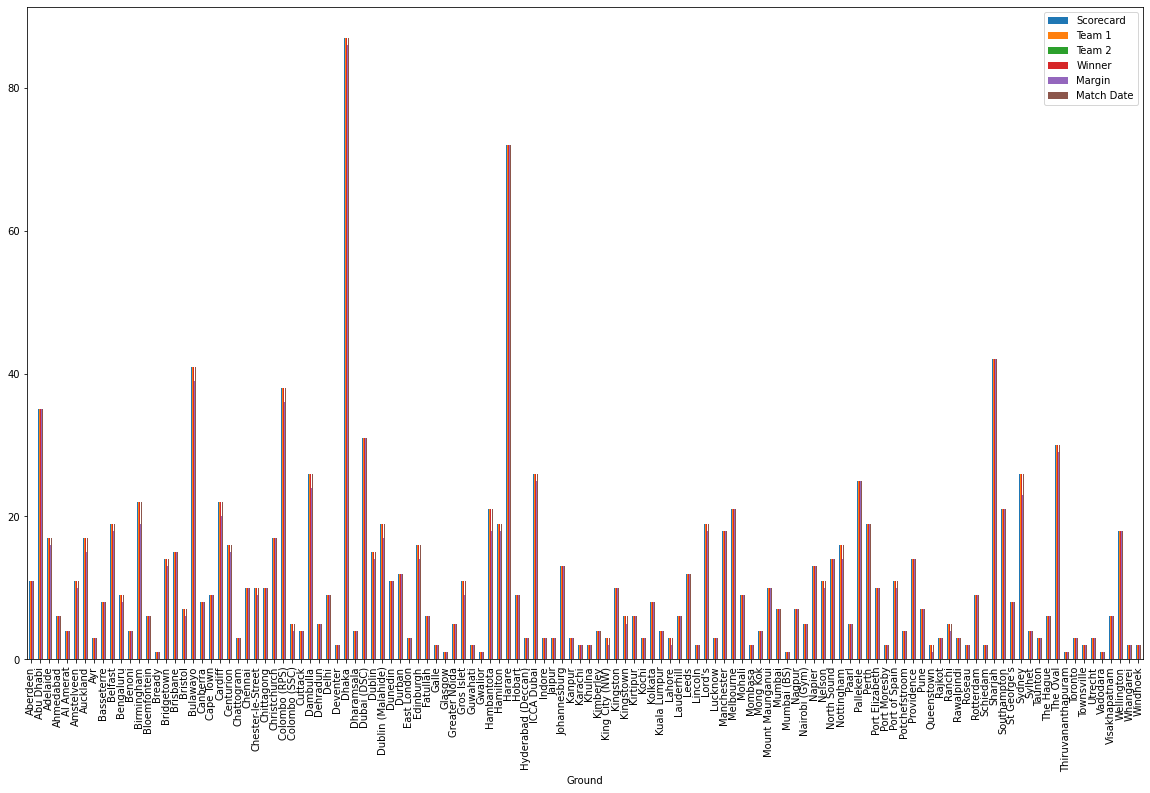

In [588]:
# group data by Ground and plot count plot
sample.groupby(['Ground']).count().plot(kind = 'bar',figsize = (20,12))

from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

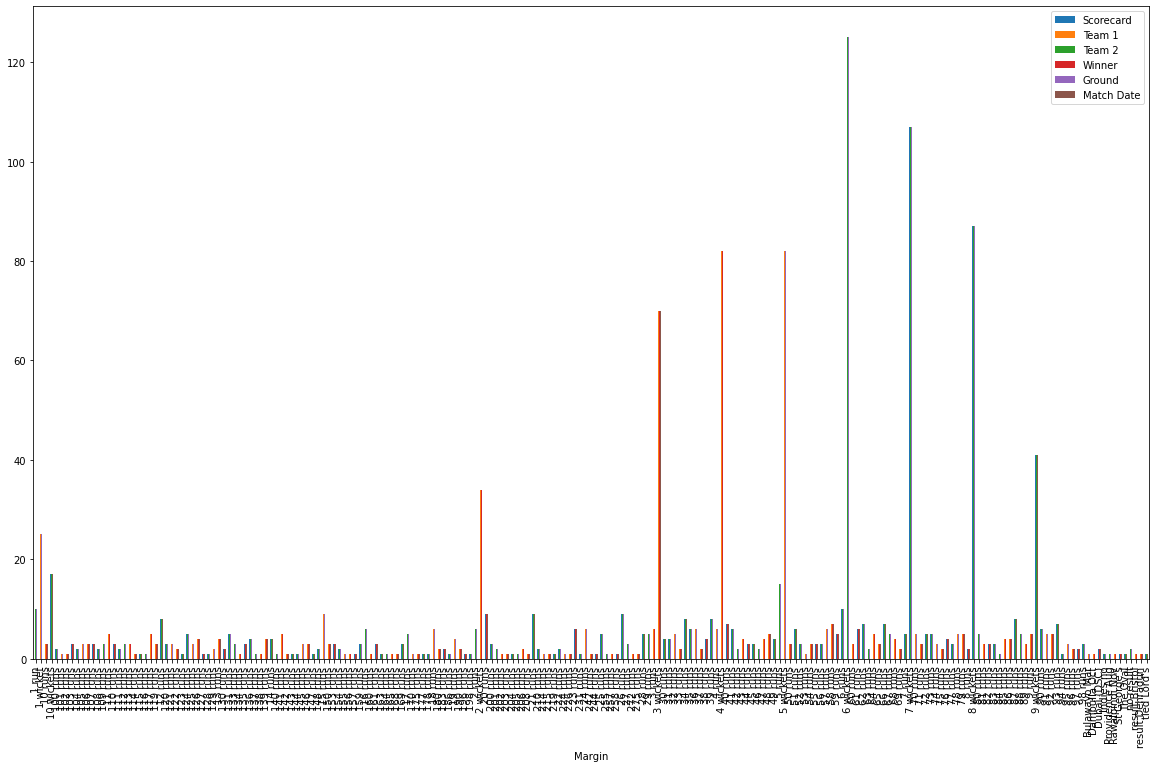

In [589]:
# group data by Margin and plot count plot
sample.groupby(['Margin']).count().plot(kind = 'bar',figsize = (20,12))

from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Catplot

Catplot shows frequencies of the of more than one categorical values at a time.

We will be doing categorical scatterplot using "swarm" kind 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; y

<Figure size 864x576 with 0 Axes>

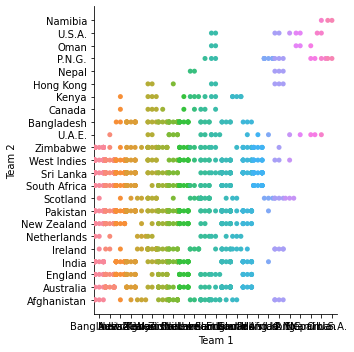

In [590]:
# cat plot between Team 1 and Team 2 column using kind="swarm"
plt.figure(figsize = (12,8))
sns.catplot(x = 'Team 1',y = 'Team 2',data = sample,kind = 'swarm')

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; y

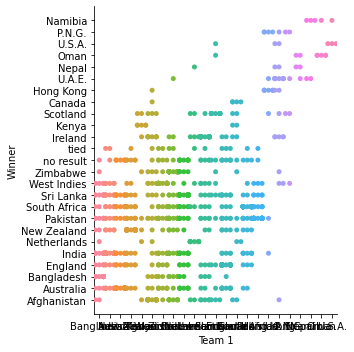

In [591]:
# cat plot between Team 1 and Winner column using kind="swarm"
sns.catplot(x = 'Team 1',y = 'Winner',data = sample,kind = 'swarm')

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; y

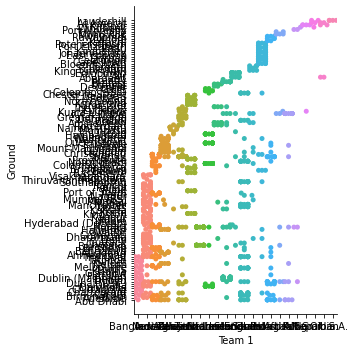

In [592]:
# cat plot between Team 1 and Ground column using kind="swarm"
sns.catplot(x = 'Team 1',y = 'Ground',kind = 'swarm',data = sample)

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.2% of the points cannot be placed; y

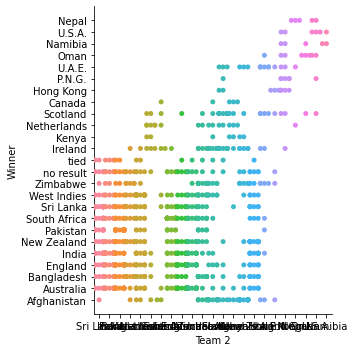

In [593]:
# cat plot between Team 2 and Winner column using kind="swarm"
sns.catplot(x = 'Team 2',y = 'Winner',data = sample,kind = 'swarm')

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; y

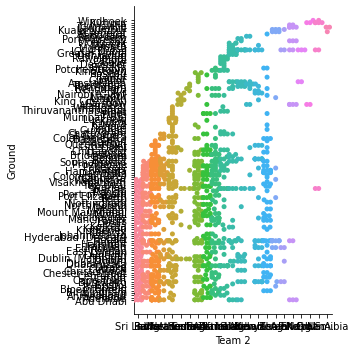

In [594]:
# cat plot between Team 2 and Ground column using kind="swarm"
sns.catplot(x = 'Team 2',y = 'Ground',kind = 'swarm',data = sample)

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

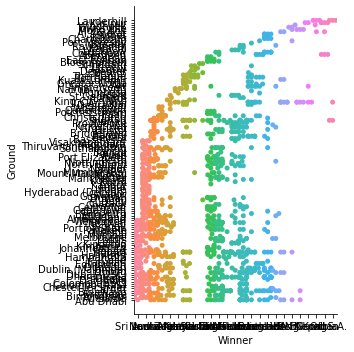

In [595]:
# cat plot between Winner and Ground column using kind="swarm"
sns.catplot(x = 'Winner',y = 'Ground',data = sample,kind = 'swarm')

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; y

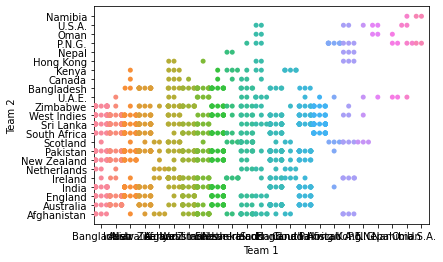

In [596]:
# swarm plot between Team 1 and Team 2 column
sns.swarmplot(x = 'Team 1',y = 'Team 2',data = sample)

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; y

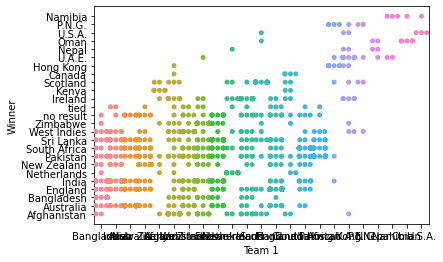

In [597]:
# swarm plot between Team 1 and Winner column
sns.swarmplot(x = 'Team 1',y = 'Winner',data = sample)

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; y

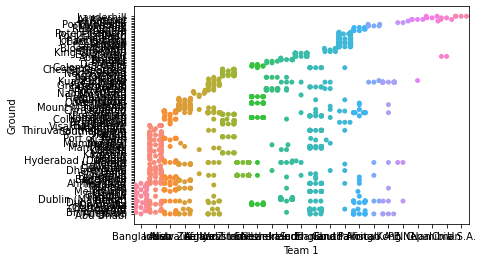

In [598]:
# swarm plot between Team 1 and Ground column
sns.swarmplot(x = 'Team 1',y = 'Ground',data = sample)

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.2% of the points cannot be placed; y

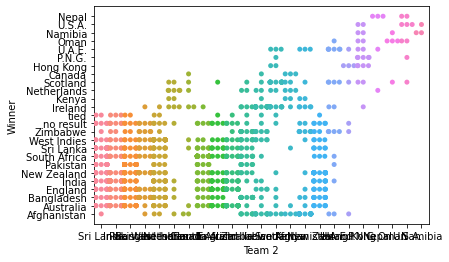

In [599]:
# swarm plot between Team 2 and Winner column
sns.swarmplot(x = 'Team 2',y = 'Winner',data = sample)

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; y

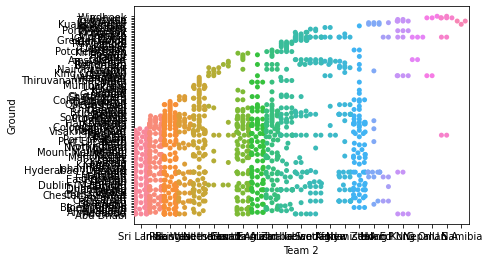

In [600]:
# swarm plot between Team 2 and Ground column
sns.swarmplot(x = 'Team 2',y = 'Ground',data = sample)

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

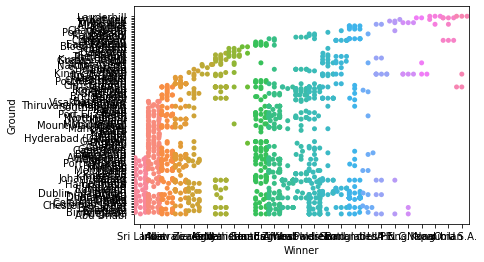

In [601]:
# swarm plot between Winner and Ground column
sns.swarmplot(x = 'Winner',y = 'Ground',data = sample)

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

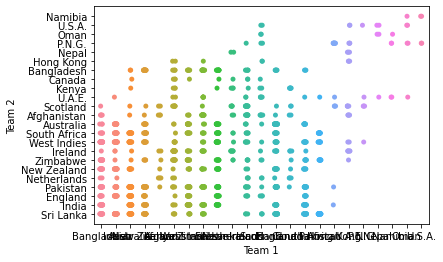

In [602]:
# strip plot between Team 1 and Team 2 column
sns.stripplot(x = 'Team 1',y = 'Team 2',data = sample)

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

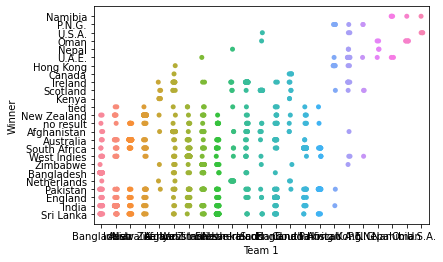

In [603]:
# strip plot between Team 1 and Winner column
sns.stripplot(x = 'Team 1',y = 'Winner',data = sample)

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

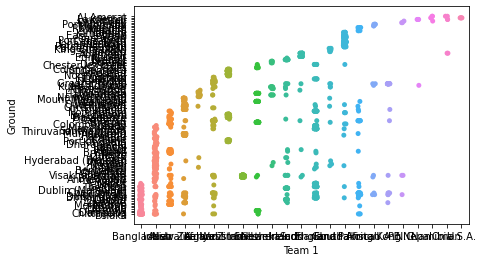

In [604]:
# strip plot between Team 1 and Ground column
sns.stripplot(x = 'Team 1',y = 'Ground',data = sample)

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

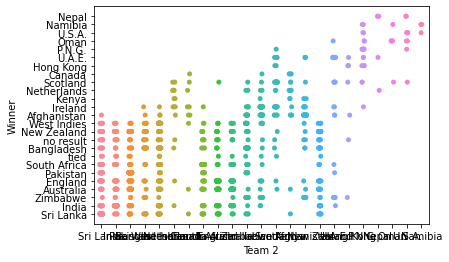

In [605]:
# strip plot between Team 2 and Winner column
sns.stripplot(x = 'Team 2',y = 'Winner',data = sample)

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

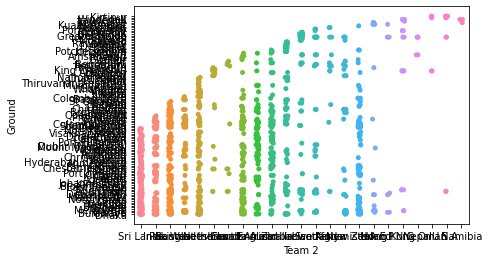

In [606]:
# strip plot between Team 2 and Ground column
sns.stripplot(x = 'Team 2',y = 'Ground',data = sample)

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

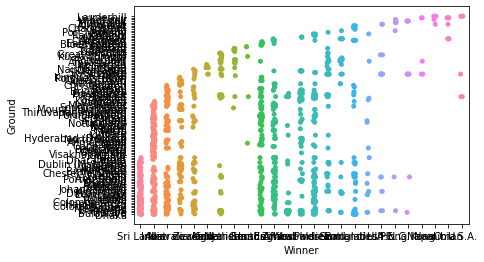

In [607]:
# strip plot between Winner and Ground column
sns.stripplot(x = 'Winner',y = 'Ground',data = sample)

From the above graph:
1. Many Winner teams are having matches repeatedly at a particular range of ground.

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

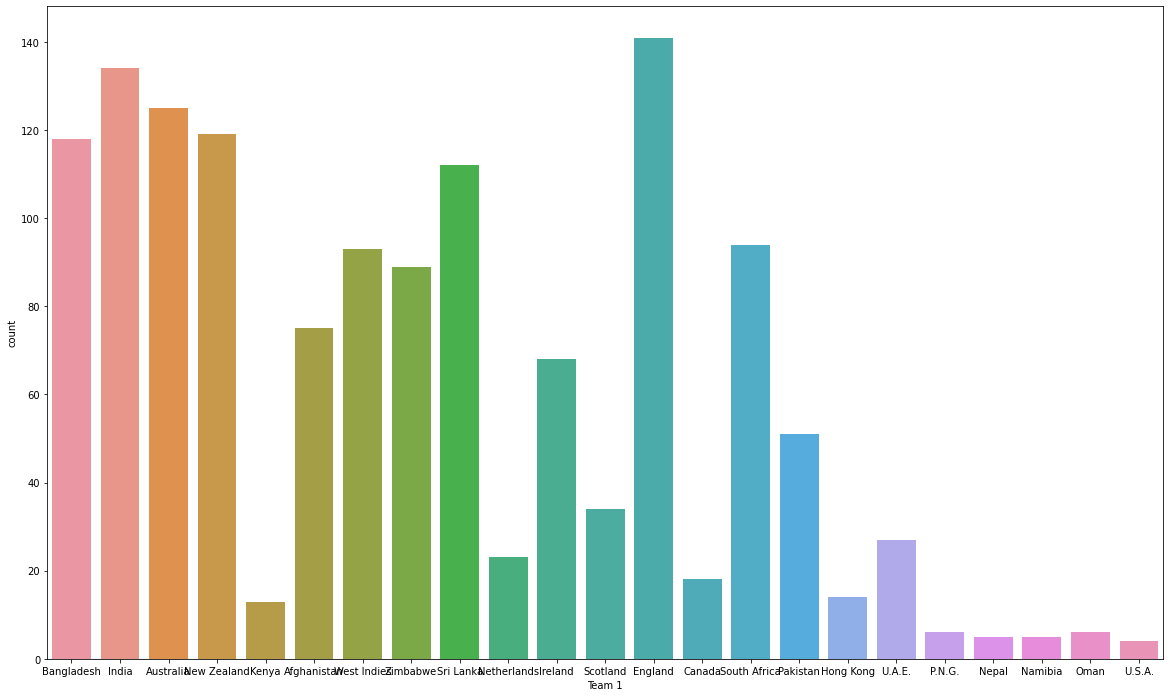

In [608]:
# count plot for Team 1 column
plt.figure(figsize = (20,12))
sns.countplot(x = 'Team 1',data = sample)

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

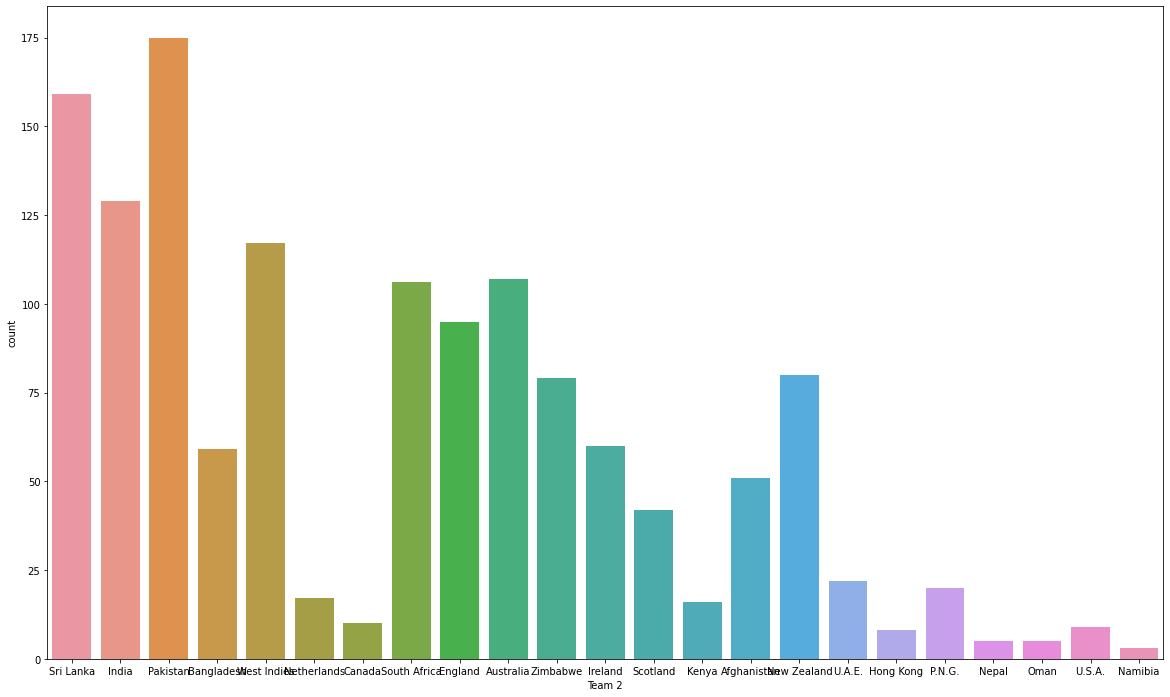

In [609]:
# count plot for Team 2 column
plt.figure(figsize = (20,12))
sns.countplot(x = 'Team 2',data = sample)

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

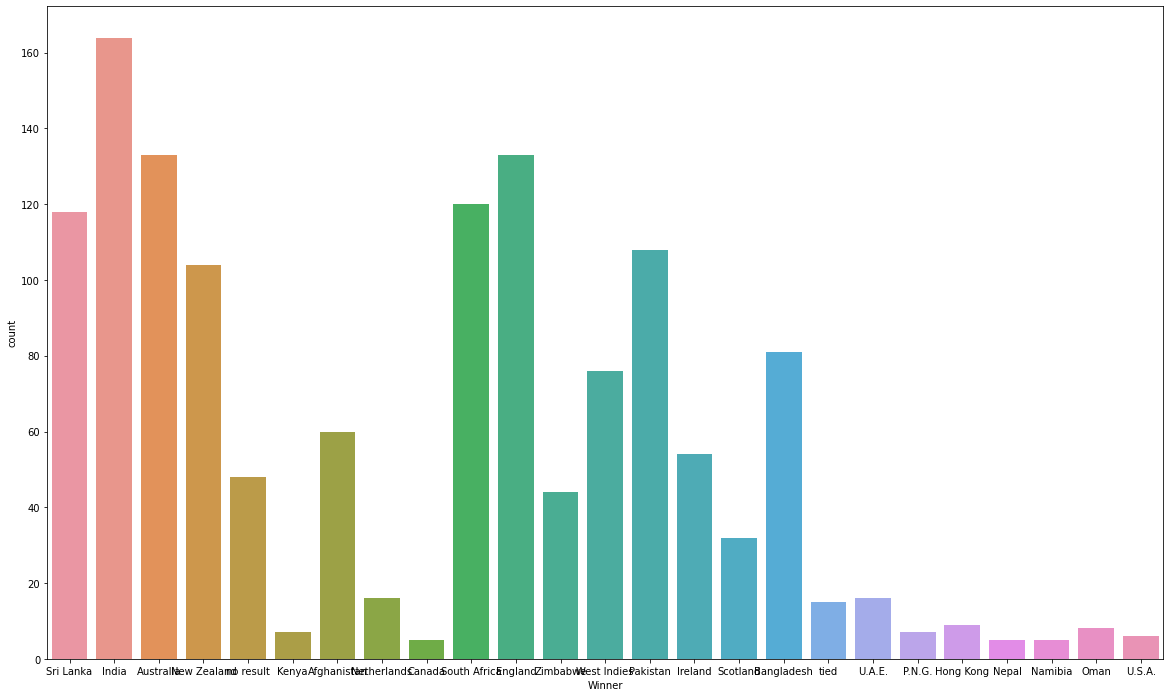

In [610]:
# count plot for Winner column
plt.figure(figsize = (20,12))
sns.countplot(x = 'Winner',data = sample)

From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

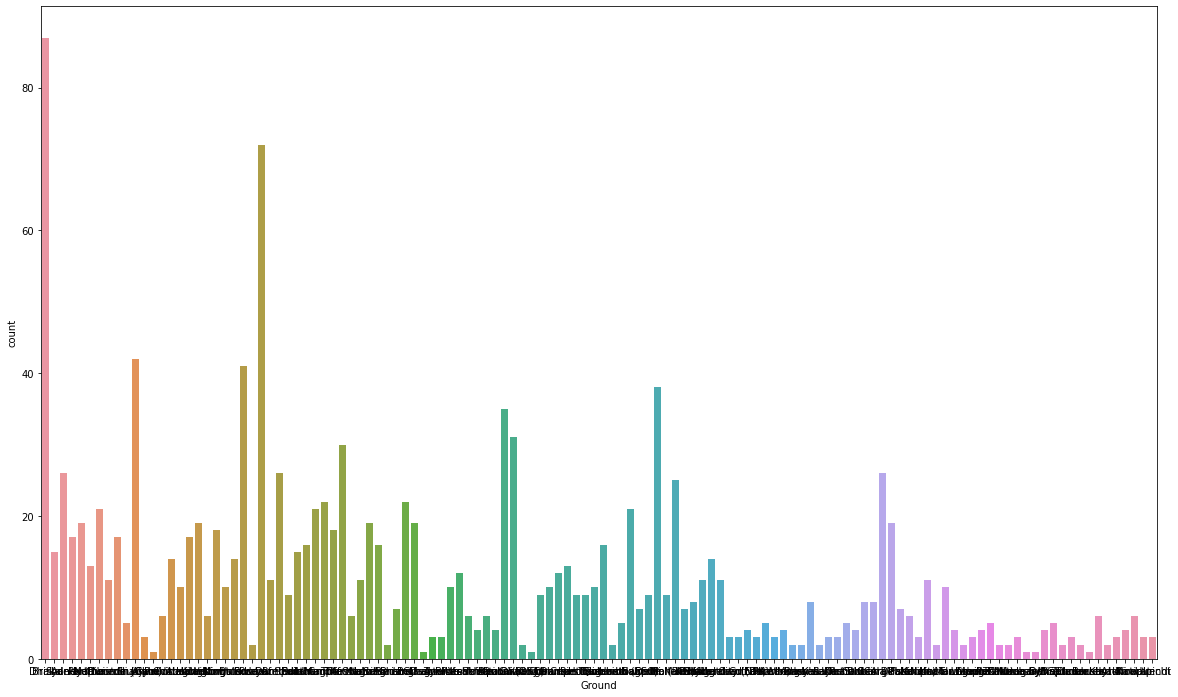

In [611]:
# count plot for Ground column
plt.figure(figsize = (20,12))
sns.countplot(x = 'Ground',data = sample)

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

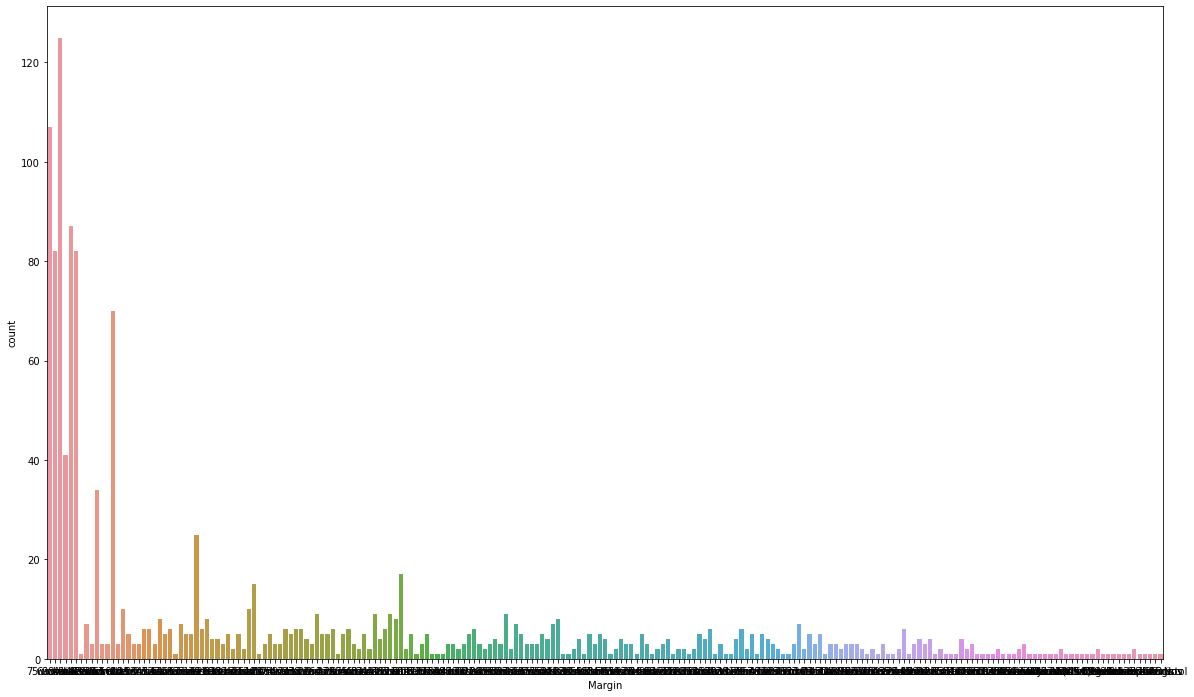

In [612]:
# count plot for Margin column
plt.figure(figsize = (20,12))
sns.countplot(x = 'Margin',data = sample)

From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Dendrogram

In [613]:
#We have some of the nan values in the dataset.
sample.isna().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

In [614]:
#Converting all the features into Categorical feature
for col in sample.columns:
  sample[col] = sample[col].astype('category')

In [615]:
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1369,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1370,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1371,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1372,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [616]:
#Label encoding the features to get the Correlation matrix of the dataset.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sample_new = pd.DataFrame()

for i in sample.columns:
  sample_new[i] = le.fit_transform(sample[i])

sample_new

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,2,18,18,167,35,435
1,1,6,18,18,143,35,438
2,2,2,6,6,155,35,446
3,3,2,18,18,191,35,448
4,4,6,18,6,179,35,316
...,...,...,...,...,...,...,...
1369,1369,18,6,6,119,28,510
1370,1370,21,1,1,38,15,510
1371,1371,21,1,21,131,15,516
1372,1372,18,6,18,119,28,518


In [617]:
sample_new.drop(['Scorecard'],axis = 1,inplace = True)

In [618]:
sample_new

,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,2,18,18,167,35,435
1,6,18,18,143,35,438
2,2,6,6,155,35,446
3,2,18,18,191,35,448
4,6,18,6,179,35,316
...,...,...,...,...,...,...
1369,18,6,6,119,28,510
1370,21,1,1,38,15,510
1371,21,1,21,131,15,516
1372,18,6,18,119,28,518


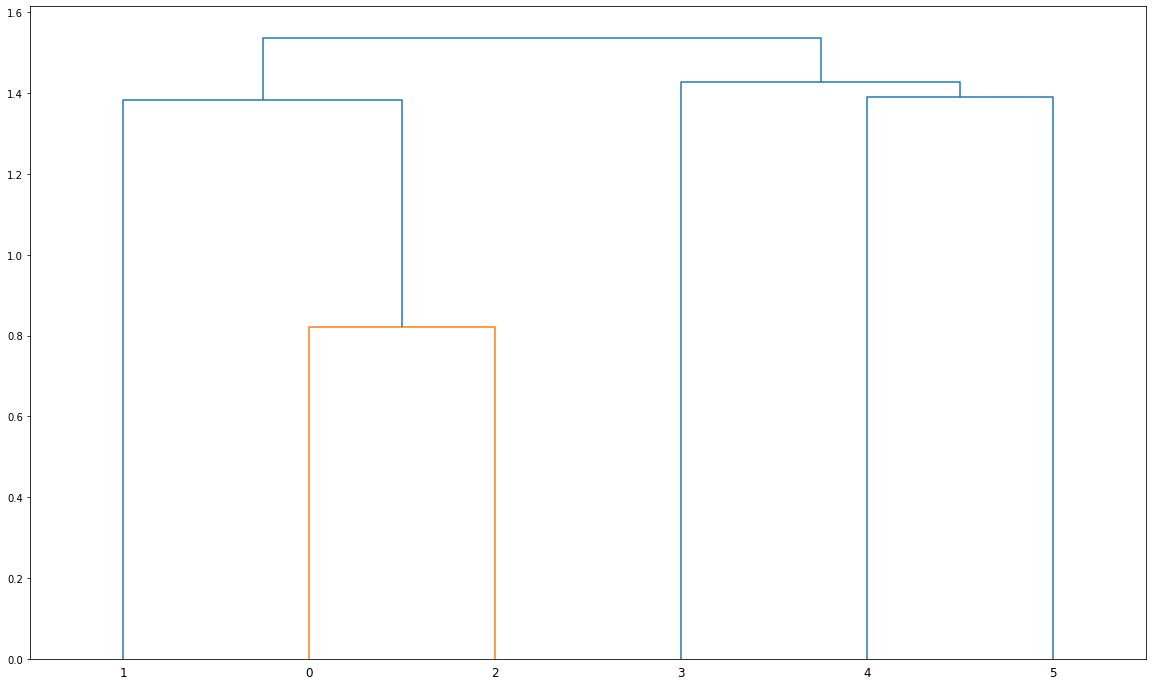

In [619]:
# Plot a Dendrogram on the columns of the dataset

# create a varibake to store ODI_data_2010_2021 after dropin nan values
sample_new = sample_new.dropna()

# import scipy
import scipy

# import hierarchy from scipy.cluster
from scipy.cluster import hierarchy as hc

# create corr variable to store correlation results
correlation = sample_new.corr(method = 'pearson')

# condense the corr variable
correlation

# pass the condensed corr variable to hierarchy linkage for getting average and store it in new varibale
z = hc.linkage(correlation,method = 'average')

# plot a dendogram with values of new varibale just created above.
plt.figure(figsize = (20,12))
Dendrogram = hc.dendrogram(z)
plt.show()

In [620]:
correlation

,Team 1,Team 2,Winner,Margin,Ground,Match Date
Team 1,1.000000,-0.097472,0.496351,-0.031038,-0.090416,-0.098819
Team 2,-0.097472,1.000000,0.284381,-0.058262,0.049123,0.006221
Winner,0.496351,0.284381,1.000000,0.091999,-0.063808,-0.034230
Margin,-0.031038,-0.058262,0.091999,1.000000,-0.020544,0.017833
Ground,-0.090416,0.049123,-0.063808,-0.020544,1.000000,0.018202
Match Date,-0.098819,0.006221,-0.034230,0.017833,0.018202,1.000000


observation from dendrogram

Strongly correlated variables:
    Team 1 and Winner

## Since, there are missing values in Margin column of dataset

We need to drop those empty columns. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [621]:
# Droping rows with missing values
sample.dropna()
# Reseting index of samples
sample.reset_index(inplace = True)
# Droping extra "index" column from dataset
sample.drop(['index'],axis = 1)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1369,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1370,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1371,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1372,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [622]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
sample_drop = sample[sample['Winner'].isin(['no result','tied'])]
# Rest index of the datframe

# Drop the extra 'index' column from dataframe
sample_drop

,index,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
17,17,ODI # 2954,Australia,West Indies,no result,NaN,Sydney,"Feb 12, 2010"
100,100,ODI # 3037,Sri Lanka,New Zealand,no result,NaN,Dambulla,"Aug 19-20, 2010"
151,151,ODI # 3088,New Zealand,Pakistan,no result,NaN,Queenstown,"Jan 26, 2011"
155,155,ODI # 3092,Sri Lanka,West Indies,no result,NaN,Colombo (SSC),"Jan 31, 2011"
173,173,ODI # 3110,India,England,tied,NaN,Bengaluru,"Feb 27, 2011"
...,...,...,...,...,...,...,...,...
1257,1257,ODI # 4196,West Indies,India,no result,Providence Aug,Providence,"Aug 8, 2019"
1299,1299,ODI # 4238,South Africa,England,no result,no result,Durban,"Feb 7, 2020"
1325,1325,ODI # 4264,Pakistan,Zimbabwe,tied,Rawalpindi Nov,Rawalpindi,"Nov 3, 2020"
1358,1358,ODI # 4298,England,Sri Lanka,no result,result Bristol,Bristol,"Jul 4, 2021"


From the above there are no rows in the Winner column with "No result" or "tied" values.

In [623]:
sample.head()

,index,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [624]:
sample['Margin'].unique()

['7 wickets', '5 wickets', '6 wickets', '9 wickets', '8 wickets', ..., '123 runs', 'Rawalpindi Nov', '164 runs', 'result Bristol', '155 runs']
Length: 214
Categories (213, object): ['1 run', '1 wicket', '10 runs', '10 wickets', ..., 'no result',
                           'result Bristol', 'result Dehradun', 'tied Lord's']

In [625]:
sample.loc[15:21]

,index,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
15,15,ODI # 2952,Australia,West Indies,Australia,8 wickets,Adelaide,"Feb 9, 2010"
16,16,ODI # 2953,New Zealand,Bangladesh,New Zealand,3 wickets,Christchurch,"Feb 11, 2010"
17,17,ODI # 2954,Australia,West Indies,no result,NaN,Sydney,"Feb 12, 2010"
18,18,ODI # 2955,Australia,West Indies,Australia,50 runs,Brisbane,"Feb 14, 2010"
19,19,ODI # 2956,Kenya,Netherlands,Kenya,6 wickets,Nairobi (Gym),"Feb 16, 2010"
20,20,ODI # 2957,Afghanistan,Canada,Afghanistan,1 run,Sharjah,"Feb 16, 2010"
21,21,ODI # 2958,Kenya,Netherlands,Netherlands,80 runs,Nairobi (Gym),"Feb 18, 2010"


In [626]:
#Resetting the index values of the Sample DataFrame.
sample.reset_index(inplace = True)

In [627]:
sample.drop(['index'],axis = 1,inplace = True)

In [628]:
sample.isna().sum()

level_0        0
Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

In [629]:
sample.dropna(inplace = True)

In [630]:
sample.drop(['level_0'],axis = 1,inplace = True)
sample.reset_index(inplace = True)
sample.drop(['index'],axis = 1,inplace = True)

In [631]:
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [632]:
# Create a list for storing runs
storing_runs = []
# Create a list for storing wickets
storing_wicks = []
# looping through dataset column Margin
for i in range(0,sample['Margin'].shape[0]):
  # Splitting the string data by space and making a list
  string = sample['Margin'].loc[i].split(' ')
  
  # Exceptin handling ====> Handled the exception handling for now in if else loop itself./

  # Search for index of "run" in string, after success the index of "run" will be stored in index variable 
  if "run" in string:
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    storing_runs.append(int(string[0])) 
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    storing_wicks.append(0)

  # Exceptin handling
  # Search for index of "runs" in string, after success the index of "runs" will be stored in index variable 
  elif "runs" in string:
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    storing_runs.append(int(string[0]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    storing_wicks.append(0)    

  # Search for index of "wicket" in string, after success the index of "wicket" will be stored in index variable 
  elif "wicket" in string:
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    storing_wicks.append(int(string[0]))
    # Appending the the 0 from splitted data to won by run list created before looping 
    storing_runs.append(0)

  #Search for index of "wickets" in string, after success the index of "wickets" will be stored in index variable 
  elif 'wickets' in string:
    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    storing_wicks.append(int(string[0]))
    # Appending the the 0 from splitted data to won by run list created before looping 
    storing_runs.append(0)
 
  else:
    storing_runs.append('-')
    storing_wicks.append('-')
    print('-')
  

# Add a new column named 'Won_By_Runs' to Datframe with the respectiev data list
#sample['Won_By_Runs'] = 
sample['Won_By_Runs']= storing_runs
# Add a new column named 'Won_By_Wickets' to Datframe with the respectiev data list
sample['Won_By_Wickets'] = storing_wicks

-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [633]:
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8
...,...,...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3


In [634]:
sample = sample[sample['Won_By_Runs'] != '-']

In [635]:
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8
...,...,...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [636]:

# Create list to store team 1 first batting
team1_batting = []

# Create list to store team 2 first batting
team2_batting = []

# looping through Team 1, Team 2, Won_by_wickets, Won_by_runs, Winner columns simultaneously using zip method in python
for i,j,k,l,m in zip(sample['Team 1'],sample['Team 2'],sample['Won_By_Wickets'],sample['Won_By_Runs'],sample['Winner']):
  # Check condition if runs are greater than 0 and team 1 is the winner
  if l > 0 and i == m:
    team1_batting.append(1) 
    # Append 1 to team_1_first_batting list
    team2_batting.append(0)    
    # Append 0 to team_2_first_batting list
   
  # Check condition if runs are greater than 0 and team 2 is the winner 
  elif l > 0 and j == m:
    # Append 0 to team_1_first_batting list
    team1_batting.append(0)
    # Append 1 to team_2_first_batting list
    team2_batting.append(1)
   
  # Check condition if wickets are greater than 0 and team 1 is the winner 
  elif k > 0 and i == m:
    # Append 0 to team_1_first_batting list
    team1_batting.append(0)
    # Append 1 to team_2_first_batting list
    team2_batting.append(1)
    
  # Check condition if wickets are greater than 0 and team 2 is the winner 
  elif k > 0 and j == m:
    # Append 1 to team_1_first_batting list
    team1_batting.append(1)
    # Append 0 to team_2_first_batting list
    team2_batting.append(0)

# Add a column named 'Team_1_First_Batting' to Dataframe with respective data list 
sample['Team_1_First_Batting'] = team1_batting
# Add a column named 'Team_2_First_Batting' to Dataframe with respective data list 
sample['Team_2_First_Batting'] = team2_batting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [637]:
# ODI_data_2010_2021 data
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [638]:
# Create a list for storing winner team label 1 or 2
winner = []
# looping through dataset columns Team 1, Team 2 and Winner simultaneously using zip method in python
for i,j,k in zip(sample['Team 1'],sample['Team 2'],sample['Winner']):
  # Checking condition if team 1 is winner
  if i == k:
    # Appending 1 to winner list
    winner.append(1)
  # Checking condition if team 2 is winner
  elif j == k:
    # Appending 2 to winner list
    winner.append(2)
# Add a column named 'Winning_team' to Dataframe with respective data list 
sample['Winning_team'] = winner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [639]:
# ODI_data_2010_2021 data
sample

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1,0,2
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0,1,2
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0,1,1
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0,1,1


## Scaling

Scaling is very crucial part of teh workflow. 
As the data we have for example: 
Won_by_run has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [640]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
    # Import MinMaxScaler 
    from sklearn.preprocessing import MinMaxScaler
    # Instantiate MinMaxScaler
    minmax = MinMaxScaler()
    # fit transform the data 
    scaled_df = minmax.fit_transform(df[col])
    # return scaled dataframe
    return scaled_df    

In [641]:
# Making a list of the column names to be scaled 
cols = ['Won_By_Runs','Won_By_Wickets']

# passing data and name for scaling
scaled_df = pd.DataFrame(scale_data(sample,cols))

In [642]:
scaled_df

,0,1
0,0.000000,0.7
1,0.000000,0.5
2,0.000000,0.6
3,0.000000,0.9
4,0.000000,0.8
...,...,...
1306,0.000000,0.3
1307,0.483636,0.0
1308,0.000000,0.4
1309,0.000000,0.3


In [643]:
sample[cols[0]] = scaled_df[0]
sample[cols[1]] = scaled_df[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [644]:
# Dumify the dataset columns Team 1 and Team 2 and store it in new variable
sample_team1 = pd.get_dummies(sample['Team 1'],prefix = 'Team 1')
sample_team2 = pd.get_dummies(sample['Team 2'],prefix = 'Team 2')

Creating the dummy columns for the features Team 1 and Team 2 as part of the Pre processing

In [645]:
sample_team1

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Canada,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,Team 1_Kenya,Team 1_Namibia,...,Team 1_Oman,Team 1_P.N.G.,Team 1_Pakistan,Team 1_Scotland,Team 1_South Africa,Team 1_Sri Lanka,Team 1_U.A.E.,Team 1_U.S.A.,Team 1_West Indies,Team 1_Zimbabwe
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [646]:
sample_team2

,Team 2_Afghanistan,Team 2_Australia,Team 2_Bangladesh,Team 2_Canada,Team 2_England,Team 2_Hong Kong,Team 2_India,Team 2_Ireland,Team 2_Kenya,Team 2_Namibia,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1323,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [647]:
sample.head()
sample2 = sample.copy()

In [648]:
sample.drop(['Team 1','Team 2'],axis = 1,inplace = True)
sample = pd.concat([sample,sample_team1],axis = 1)
sample = pd.concat([sample,sample_team2],axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [649]:
sample.head()

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.0,0.7,1,0,2,...,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.0,0.5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.0,0.6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.0,0.9,1,0,2,...,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.0,0.8,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [650]:
# dumified_data
sample.isna().sum()

Scorecard                0
Winner                   0
Margin                   0
Ground                   0
Match Date               0
Won_By_Runs             13
Won_By_Wickets          13
Team_1_First_Batting     0
Team_2_First_Batting     0
Winning_team             0
Team 1_Afghanistan       0
Team 1_Australia         0
Team 1_Bangladesh        0
Team 1_Canada            0
Team 1_England           0
Team 1_Hong Kong         0
Team 1_India             0
Team 1_Ireland           0
Team 1_Kenya             0
Team 1_Namibia           0
Team 1_Nepal             0
Team 1_Netherlands       0
Team 1_New Zealand       0
Team 1_Oman              0
Team 1_P.N.G.            0
Team 1_Pakistan          0
Team 1_Scotland          0
Team 1_South Africa      0
Team 1_Sri Lanka         0
Team 1_U.A.E.            0
Team 1_U.S.A.            0
Team 1_West Indies       0
Team 1_Zimbabwe          0
Team 2_Afghanistan       0
Team 2_Australia         0
Team 2_Bangladesh        0
Team 2_Canada            0
T

In [651]:
sample.columns

Index(['Scorecard', 'Winner', 'Margin', 'Ground', 'Match Date', 'Won_By_Runs',
       'Won_By_Wickets', 'Team_1_First_Batting', 'Team_2_First_Batting',
       'Winning_team', 'Team 1_Afghanistan', 'Team 1_Australia',
       'Team 1_Bangladesh', 'Team 1_Canada', 'Team 1_England',
       'Team 1_Hong Kong', 'Team 1_India', 'Team 1_Ireland', 'Team 1_Kenya',
       'Team 1_Namibia', 'Team 1_Nepal', 'Team 1_Netherlands',
       'Team 1_New Zealand', 'Team 1_Oman', 'Team 1_P.N.G.', 'Team 1_Pakistan',
       'Team 1_Scotland', 'Team 1_South Africa', 'Team 1_Sri Lanka',
       'Team 1_U.A.E.', 'Team 1_U.S.A.', 'Team 1_West Indies',
       'Team 1_Zimbabwe', 'Team 2_Afghanistan', 'Team 2_Australia',
       'Team 2_Bangladesh', 'Team 2_Canada', 'Team 2_England',
       'Team 2_Hong Kong', 'Team 2_India', 'Team 2_Ireland', 'Team 2_Kenya',
       'Team 2_Namibia', 'Team 2_Nepal', 'Team 2_Netherlands',
       'Team 2_New Zealand', 'Team 2_Oman', 'Team 2_P.N.G.', 'Team 2_Pakistan',
       'Team 2_Sc

In [652]:
#removing the null values from the rows
sample.dropna(inplace = True)
sample.isna().sum()

Scorecard               0
Winner                  0
Margin                  0
Ground                  0
Match Date              0
Won_By_Runs             0
Won_By_Wickets          0
Team_1_First_Batting    0
Team_2_First_Batting    0
Winning_team            0
Team 1_Afghanistan      0
Team 1_Australia        0
Team 1_Bangladesh       0
Team 1_Canada           0
Team 1_England          0
Team 1_Hong Kong        0
Team 1_India            0
Team 1_Ireland          0
Team 1_Kenya            0
Team 1_Namibia          0
Team 1_Nepal            0
Team 1_Netherlands      0
Team 1_New Zealand      0
Team 1_Oman             0
Team 1_P.N.G.           0
Team 1_Pakistan         0
Team 1_Scotland         0
Team 1_South Africa     0
Team 1_Sri Lanka        0
Team 1_U.A.E.           0
Team 1_U.S.A.           0
Team 1_West Indies      0
Team 1_Zimbabwe         0
Team 2_Afghanistan      0
Team 2_Australia        0
Team 2_Bangladesh       0
Team 2_Canada           0
Team 2_England          0
Team 2_Hong 

In [653]:
#The ODI Statistics Data for the year 2021.
sample[1280:]

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
1292,ODI # 4281,India,66 runs,Pune,"Mar 23, 2021",0.003636,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1293,ODI # 4282,New Zealand,164 runs,Wellington,"Mar 26, 2021",0.000000,0.8,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1294,ODI # 4283,England,6 wickets,Pune,"Mar 26, 2021",0.000000,0.4,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1295,ODI # 4284,India,7 runs,Pune,"Mar 28, 2021",0.000000,0.5,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1296,ODI # 4285,Pakistan,3 wickets,Centurion,"Apr 2, 2021",0.000000,0.8,1,0,2,...,0,0,1,0,0,0,0,0,0,0
1297,ODI # 4286,South Africa,17 runs,Johannesburg,"Apr 4, 2021",0.000000,0.9,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1298,ODI # 4287,Pakistan,28 runs,Centurion,"Apr 7, 2021",0.189091,0.0,0,1,2,...,0,0,1,0,0,0,0,0,0,0
1299,ODI # 4288,Netherlands,14 runs,Rotterdam,"May 19, 2021",0.156364,0.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1300,ODI # 4289,Scotland,6 wickets,Rotterdam,"May 20, 2021",0.000000,0.3,1,0,2,...,0,0,0,1,0,0,0,0,0,0
1301,ODI # 4290,Bangladesh,33 runs,Dhaka,"May 23, 2021",0.563636,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [654]:
# Seperate feature and target variables
# create variable to store datframe without 'Scorecard','Margin','Winner','Ground','Winning_team','Match Date' data
features = sample.drop(['Scorecard','Margin','Winner','Ground','Winning_team','Match Date'],axis = 1)
# Create varaiable to store 'Winning_team' data
target = sample['Winning_team']

In [655]:
#Finding the 2021 data starting index
sample[sample['Match Date'] == 'Jan 18, 2021']

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
1280,ODI # 4269,Ireland,112 runs,Abu Dhabi,"Jan 18, 2021",0.24,0.0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [656]:
sample_2021 = sample2[1280:]
sample_2021

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
1292,ODI # 4281,India,England,India,66 runs,Pune,"Mar 23, 2021",0.003636,0.0,1,0,1
1293,ODI # 4282,New Zealand,Bangladesh,New Zealand,164 runs,Wellington,"Mar 26, 2021",0.000000,0.8,1,0,1
1294,ODI # 4283,India,England,England,6 wickets,Pune,"Mar 26, 2021",0.000000,0.4,1,0,2
1295,ODI # 4284,India,England,India,7 runs,Pune,"Mar 28, 2021",0.000000,0.5,1,0,1
1296,ODI # 4285,South Africa,Pakistan,Pakistan,3 wickets,Centurion,"Apr 2, 2021",0.000000,0.8,1,0,2
1297,ODI # 4286,South Africa,Pakistan,South Africa,17 runs,Johannesburg,"Apr 4, 2021",0.000000,0.9,1,0,1
1298,ODI # 4287,South Africa,Pakistan,Pakistan,28 runs,Centurion,"Apr 7, 2021",0.189091,0.0,0,1,2
1299,ODI # 4288,Netherlands,Scotland,Netherlands,14 runs,Rotterdam,"May 19, 2021",0.156364,0.0,1,0,1
1300,ODI # 4289,Netherlands,Scotland,Scotland,6 wickets,Rotterdam,"May 20, 2021",0.000000,0.3,1,0,2
1301,ODI # 4290,Bangladesh,Sri Lanka,Bangladesh,33 runs,Dhaka,"May 23, 2021",0.563636,0.0,1,0,1


In [657]:
# Create test_data_x and test_data_y variable with samples all 2021 data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size = 0.3)

In [658]:
# Drop range of 2021 data from feature variable 



In [659]:
# # Drop range of 2021 data from feature variable 


In [660]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size = 0.2,random_state = 123)
# split the data into train set of size 80% and valid set of size 20% with random_state = 123

## Modeling

In [661]:
# importing necessary libraries for calculating metrics of model
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Function for calculating all the relevant metrics with parameter as model instance
def metrics(model):

  # Calculate the classification report of model passed to the function
  return classification_report(test_y,model.predict(test_x))
 

In [662]:
# Visualize importance of all the features in the dataset for the prediction
# Helper function for Visualizing importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances,training_set):
  feature_importances_df = pd.DataFrame()
  # creating dataframe for feature name and feature importance
  _df = pd.DataFrame()
  _df['feature_importances'] = feature_importances
  _df['Features'] = training_set.columns

  feature_importances_df = _df
  # grouping all data and sorting in descending order
  feature_importances_df = feature_importances_df.sort_values(by = ['feature_importances'],ascending = False)
    
  # ploting feature importance data using boxenplot
  plot = sns.boxenplot(x = 'feature_importances',y = 'Features',data = feature_importances_df)
    
  # return fig,ax
  return plot

### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Training set accuracy is  0.7090558766859345
Test set accuracy is  0.7115384615384616
The Classification report is               precision    recall  f1-score   support

           1       0.74      0.85      0.79       168
           2       0.62      0.47      0.53        92

    accuracy                           0.71       260
   macro avg       0.68      0.66      0.66       260
weighted avg       0.70      0.71      0.70       260



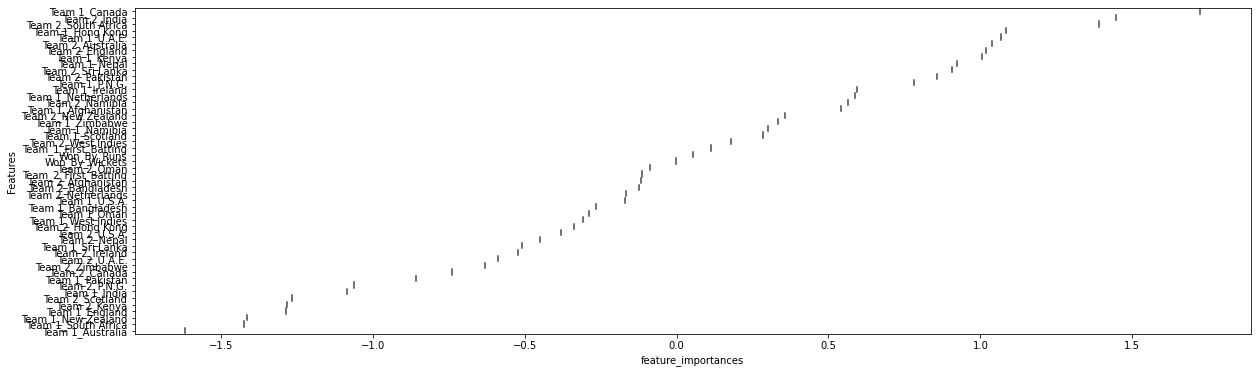

CPU times: user 631 ms, sys: 173 ms, total: 804 ms
Wall time: 655 ms


In [663]:
%%time
# Fit a LogisticRegression model to the train dataset
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_model = LogisticRegression()

# Fit the model to the data
log_model.fit(train_x,train_y)

# print score on train and valid set
print('Training set accuracy is ',log_model.score(train_x,train_y))
print('Test set accuracy is ',log_model.score(test_x,test_y))
# print classification report of the model using function created before
print('The Classification report is',classification_report(test_y,log_model.predict(test_x)))

#print(log_model.coef_[0])
# visualizing importance of features
plt.figure(figsize = (20,6))
plot = visualize_importance(log_model.coef_[0],train_x)  #We use coef_[0] to get the feature importances of the model.
plt.show(plot)

### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

The Training set accuracy score is  0.9903660886319846
The Testing set accuracy score is  0.85
The Classification report is                precision    recall  f1-score   support

           1       0.89      0.88      0.88       168
           2       0.78      0.79      0.79        92

    accuracy                           0.85       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.85      0.85      0.85       260



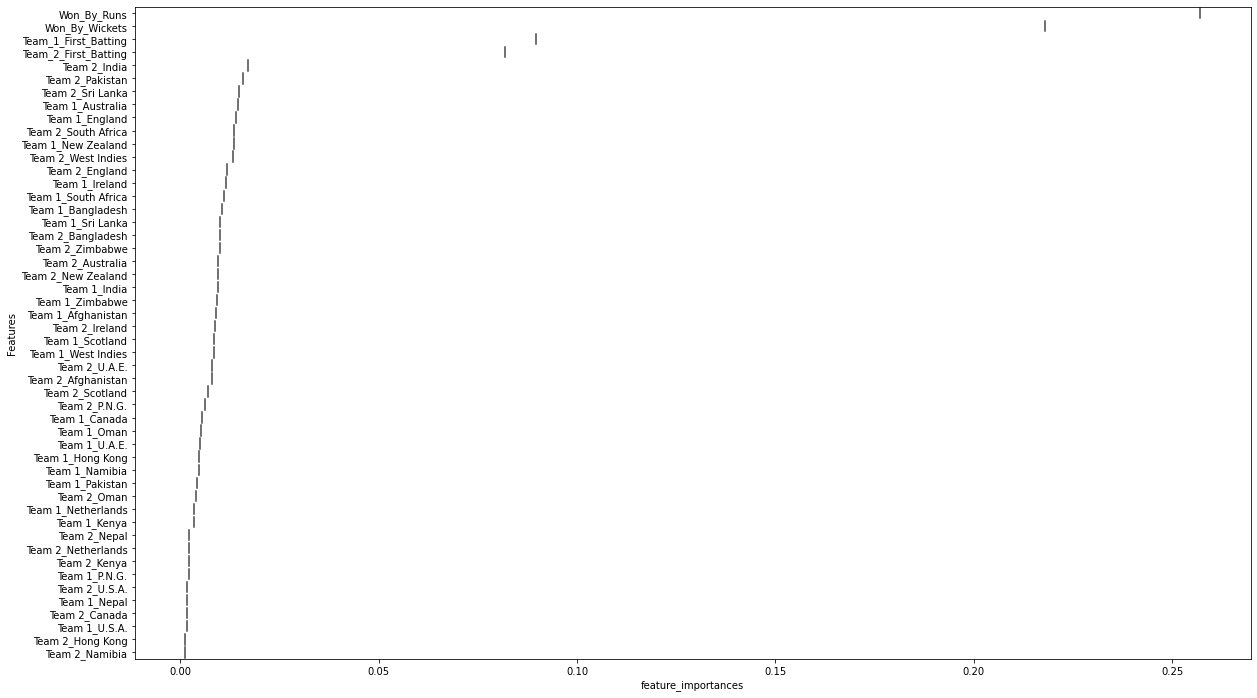

CPU times: user 971 ms, sys: 55.8 ms, total: 1.03 s
Wall time: 1.04 s


In [664]:
%%time
# Fit a Random Forest Classifier model to the train dataset
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy score is ',rf.score(train_x,train_y))
print('The Testing set accuracy score is ',rf.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,rf.predict(test_x)))

# visualizing the inportance of features.
plt.figure(figsize = (20,12))
plot = visualize_importance(rf.feature_importances_,train_x)
plt.show(plot)

### XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework.

In [665]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Training set accuracy is  0.9007707129094412
Testing set accuracy is  0.8884615384615384
The Classification report of the model is                precision    recall  f1-score   support

           1       0.92      0.91      0.91       168
           2       0.84      0.85      0.84        92

    accuracy                           0.89       260
   macro avg       0.88      0.88      0.88       260
weighted avg       0.89      0.89      0.89       260



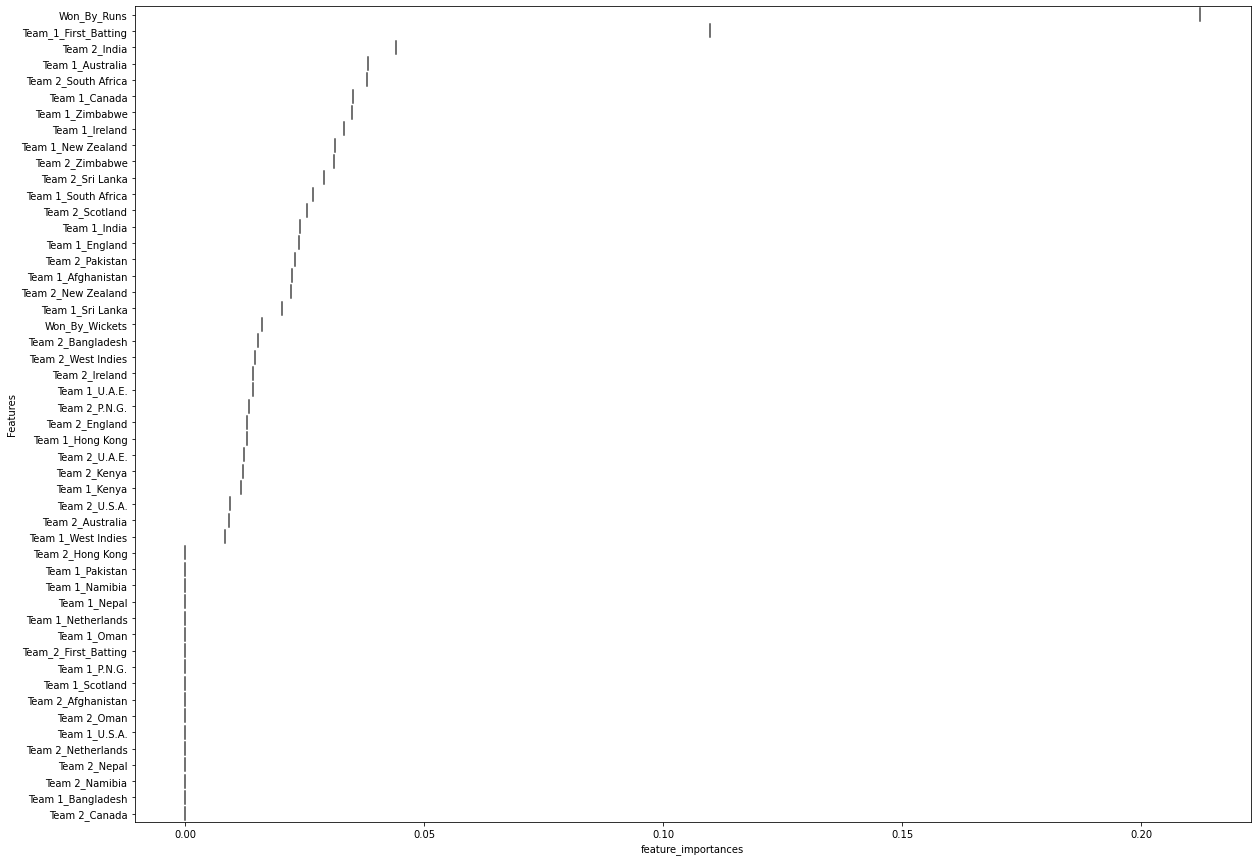

CPU times: user 764 ms, sys: 50.4 ms, total: 814 ms
Wall time: 798 ms


In [666]:
%%time
# Fit a XGBClassifier model to the train dataset
# Import XGBClassifier
from xgboost import XGBClassifier

# Instantiate the model
xgb = XGBClassifier()

# fitting the model on train data
xgb.fit(train_x,train_y)

# print score on train and valid set 
print('Training set accuracy is ',xgb.score(train_x,train_y))
print('Testing set accuracy is ',xgb.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report of the model is ',metrics(xgb))
# visualizing the inportance of features.
plt.figure(figsize = (20,15))
plot = visualize_importance(xgb.feature_importances_,train_x)
plt.show(plot)

### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [667]:
%%time
# Fit a SVC model to the train dataset
# Import SVC
from sklearn.svm import SVC

# Instantiate the model
svc_model = SVC()

# Fit the model to the data
svc_model.fit(train_x,train_y)

# print score on train and valid set 
print("The Training set accuracy is ",svc_model.score(train_x,train_y))
print("The Test set accuracy is ",svc_model.score(test_x,test_y))

# print classification report of the model using function created before
print("The Classification report is ",classification_report(test_y,svc_model.predict(test_x)))

The Training set accuracy is  0.8911368015414258
The Test set accuracy is  0.8307692307692308
The Classification report is                precision    recall  f1-score   support

           1       0.86      0.88      0.87       168
           2       0.77      0.74      0.76        92

    accuracy                           0.83       260
   macro avg       0.82      0.81      0.81       260
weighted avg       0.83      0.83      0.83       260

CPU times: user 178 ms, sys: 2.91 ms, total: 181 ms
Wall time: 176 ms


### GaussianNB

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. 
It's specifically used when the features have continuous values. 
It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [668]:
%%time
# Fit a GaussianNB model to the train dataset
# Import GaussianNB
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
gaussian_model = GaussianNB()

# Fit the model to the data
gaussian_model.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy score is ',gaussian_model.score(train_x,train_y))
print('The Test set accuracy score is ',gaussian_model.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,gaussian_model.predict(test_x)))

The Training set accuracy score is  0.6213872832369942
The Test set accuracy score is  0.65
The Classification report is                precision    recall  f1-score   support

           1       0.66      0.93      0.77       168
           2       0.52      0.14      0.22        92

    accuracy                           0.65       260
   macro avg       0.59      0.53      0.50       260
weighted avg       0.61      0.65      0.58       260

CPU times: user 28.4 ms, sys: 997 µs, total: 29.4 ms
Wall time: 34.2 ms


### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [669]:
%%time
# Fit a K-Neighbour classifier model to the train dataset
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn = KNeighborsClassifier()

# fitting the model on train data
knn.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy score is ',knn.score(train_x,train_y))
print('The Test set accuracy score is ',knn.score(test_x,test_y))

# print classification report of the model using function created before
print(classification_report(test_y,knn.predict(test_x)))

The Training set accuracy score is  0.8323699421965318
The Test set accuracy score is  0.7615384615384615
              precision    recall  f1-score   support

           1       0.79      0.86      0.82       168
           2       0.69      0.59      0.64        92

    accuracy                           0.76       260
   macro avg       0.74      0.72      0.73       260
weighted avg       0.76      0.76      0.76       260

CPU times: user 173 ms, sys: 76.2 ms, total: 249 ms
Wall time: 266 ms


### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

In [670]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dtree = DecisionTreeClassifier()

# fitting the model on train data
dtree.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy is ',dtree.score(train_x,train_y))
print('The Test set accuracy is ',dtree.score(test_x,test_y))

The Training set accuracy is  0.9903660886319846
The Test set accuracy is  0.7884615384615384
CPU times: user 27.7 ms, sys: 19.4 ms, total: 47.2 ms
Wall time: 47.4 ms


### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [671]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gradient_model = GradientBoostingClassifier()

# fitting the model on train data
gradient_model.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy is ',gradient_model.score(train_x,train_y))
print('The Testing set accuracy is  ',gradient_model.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,gradient_model.predict(test_x)))

The Training set accuracy is  0.9046242774566474
The Testing set accuracy is   0.85
The Classification report is                precision    recall  f1-score   support

           1       0.88      0.89      0.88       168
           2       0.79      0.78      0.79        92

    accuracy                           0.85       260
   macro avg       0.84      0.83      0.84       260
weighted avg       0.85      0.85      0.85       260

CPU times: user 202 ms, sys: 0 ns, total: 202 ms
Wall time: 217 ms


### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [672]:
%%time
# Fit a Bagging Classifier model to the train dataset
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the model
bagging_model = BaggingClassifier()

# fitting the model on train data
bagging_model.fit(train_x,train_y)

# print score on train and valid set 
print('The Training accuracy score is ',bagging_model.score(train_x,train_y))
print('The Testing set accuracy score is ',bagging_model.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,bagging_model.predict(test_x)))

The Training accuracy score is  0.9778420038535646
The Testing set accuracy score is  0.8653846153846154
The Classification report is                precision    recall  f1-score   support

           1       0.89      0.90      0.90       168
           2       0.81      0.80      0.81        92

    accuracy                           0.87       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.87      0.87      0.87       260

CPU times: user 73.8 ms, sys: 5.11 ms, total: 79 ms
Wall time: 78.4 ms


### Easy Ensemble Classifier

This algorithm is known as EasyEnsemble.
The classifier is an ensemble of AdaBoost learners trained on different balanced bootstrap samples. 
The balancing is achieved by random under-sampling.

In [673]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [674]:
len(train_x.columns)

50

In [675]:
'''%%time
# Fit a EasyEnsembleClassifier model to the train dataset
# Import EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Instantiate the model
easyensemble_model = EasyEnsembleClassifier(random_state = 123)

# fitting the model on train data
easyensemble_model.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy is ',easyensemble_model.score(train_x,train_y))
print('The Testing set accuracy is ',easyensemble_model.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,easyensemble_model.predict(test_x)))'''

"%%time\n# Fit a EasyEnsembleClassifier model to the train dataset\n# Import EasyEnsembleClassifier\nfrom imblearn.ensemble import EasyEnsembleClassifier\n\n# Instantiate the model\neasyensemble_model = EasyEnsembleClassifier(random_state = 123)\n\n# fitting the model on train data\neasyensemble_model.fit(train_x,train_y)\n\n# print score on train and valid set \nprint('The Training set accuracy is ',easyensemble_model.score(train_x,train_y))\nprint('The Testing set accuracy is ',easyensemble_model.score(test_x,test_y))\n\n# print classification report of the model using function created before\nprint('The Classification report is ',classification_report(test_y,easyensemble_model.predict(test_x)))"

### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [676]:
!pip install adaboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement adaboost (from versions: none)
ERROR: No matching distribution found for adaboost


In [677]:
%%time
# Fit a AdaBoost classifier model to the train dataset
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
adaboost_model = AdaBoostClassifier()

# fitting the model on train data
adaboost_model.fit(train_x,train_y)

# print score on train and valid set 
print('The Training set accuracy is ',adaboost_model.score(train_x,train_y))
print('The Testing set accuracy is ',adaboost_model.score(test_x,test_y))

# print classification report of the model using function created before
print('The Classification report is ',classification_report(test_y,adaboost_model.predict(test_x)))

The Training set accuracy is  0.7003853564547207
The Testing set accuracy is  0.676923076923077
The Classification report is                precision    recall  f1-score   support

           1       0.72      0.83      0.77       168
           2       0.56      0.40      0.47        92

    accuracy                           0.68       260
   macro avg       0.64      0.61      0.62       260
weighted avg       0.66      0.68      0.66       260

CPU times: user 282 ms, sys: 1.1 ms, total: 283 ms
Wall time: 302 ms


### Now working with test dataset (year 2021 matches)

In [678]:
test_y

1164    1
31      2
348     2
385     1
866     2
       ..
279     1
786     1
785     2
1257    1
1124    1
Name: Winning_team, Length: 260, dtype: int64

In [679]:
# test data labels 
test_data = pd.DataFrame(test_y)
test_data

,Winning_team
1164,1
31,2
348,2
385,1
866,2
...,...
279,1
786,1
785,2
1257,1


In [680]:
data1.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [681]:
# Creating a dataframe for with data Team 1 , Team 2 and Winner with data of all year 2021 matches
sample_new[['Team 1','Team 2','Winner']][1280:]

,Team 1,Team 2,Winner
1280,16,20,16
1281,19,16,19
1282,6,21,21
1283,6,21,6
1284,6,21,6
...,...,...,...
1369,18,6,6
1370,21,1,1
1371,21,1,21
1372,18,6,18


In [682]:
sample[1280:]

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
1292,ODI # 4281,India,66 runs,Pune,"Mar 23, 2021",0.003636,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1293,ODI # 4282,New Zealand,164 runs,Wellington,"Mar 26, 2021",0.000000,0.8,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1294,ODI # 4283,England,6 wickets,Pune,"Mar 26, 2021",0.000000,0.4,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1295,ODI # 4284,India,7 runs,Pune,"Mar 28, 2021",0.000000,0.5,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1296,ODI # 4285,Pakistan,3 wickets,Centurion,"Apr 2, 2021",0.000000,0.8,1,0,2,...,0,0,1,0,0,0,0,0,0,0
1297,ODI # 4286,South Africa,17 runs,Johannesburg,"Apr 4, 2021",0.000000,0.9,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1298,ODI # 4287,Pakistan,28 runs,Centurion,"Apr 7, 2021",0.189091,0.0,0,1,2,...,0,0,1,0,0,0,0,0,0,0
1299,ODI # 4288,Netherlands,14 runs,Rotterdam,"May 19, 2021",0.156364,0.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1300,ODI # 4289,Scotland,6 wickets,Rotterdam,"May 20, 2021",0.000000,0.3,1,0,2,...,0,0,0,1,0,0,0,0,0,0
1301,ODI # 4290,Bangladesh,33 runs,Dhaka,"May 23, 2021",0.563636,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [683]:
sample2

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.0,0.7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.0,0.5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0.0,0.6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.0,0.9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0.0,0.8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1320,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",NaN,NaN,1,0,2
1321,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",NaN,NaN,0,1,2
1322,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",NaN,NaN,0,1,1
1323,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",NaN,NaN,0,1,1


In [684]:
features

,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Canada,Team 1_England,Team 1_Hong Kong,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,0.000000,0.7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.6,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.9,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.000000,0.8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.000000,0.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,0.000000,0.3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0.483636,0.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1308,0.000000,0.4,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [685]:
# Predicting on test data 
y_pred = rf.predict(features[1280:])
y_pred

array([1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1])

In [686]:
sample2.dropna(inplace = True)

In [687]:
len(sample2[1280:])

18

In [688]:
match_result = pd.DataFrame()

In [696]:
#  Creating a dataframe with columns "Actual" and "Predicted"
match_result = sample2[['Team 1','Team 2','Winner']][1280:].copy()
match_result.reset_index(inplace = True)
match_result.drop(['index'],axis = 1,inplace = True)
# 'Actual' column data is true test y label
#Actual Winner data is displayed in the above step

# 'Predicted' column is predicted labels
# match_result['Predicted Winner'] = []

# creat a list for storing coverted winner data from numerical label to object
predicted_result = []

# looping through res['Predicted'],teams['Team 1'],teams['Team 2'] simultaneously using zip function in python
for i in range(len(match_result)):
  # Check condition if predicted label is equal to 1
  if y_pred[i] == 1:
    predicted_result.append(match_result['Team 1'].loc[i])
    # Check condition if predicted label is equal to 2
  else:
    # Append winner list the object name of team 2
    predicted_result.append(match_result['Team 2'].loc[i])
       

# Add a column 'PPred_Winner' with predicted winner data list
match_result['Predicted Winner'] = predicted_result

In [697]:
#match_result_data for matches occured in year 2021.
match_result

,Team 1,Team 2,Winner,Predicted Winner
0,India,England,India,India
1,New Zealand,Bangladesh,New Zealand,New Zealand
2,India,England,England,England
3,India,England,India,England
4,South Africa,Pakistan,Pakistan,Pakistan
5,South Africa,Pakistan,South Africa,South Africa
6,South Africa,Pakistan,Pakistan,Pakistan
7,Netherlands,Scotland,Netherlands,Netherlands
8,Netherlands,Scotland,Scotland,Scotland
9,Bangladesh,Sri Lanka,Bangladesh,Bangladesh


In [ ]:
# match_result data

,Team 1,Team 2,Winner,Pred_Winner
1269,U.A.E.,Ireland,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh,Bangladesh
1271,Afghanistan,Ireland,Afghanistan,Afghanistan
1272,Bangladesh,West Indies,Bangladesh,Bangladesh
1273,Afghanistan,Ireland,Afghanistan,Afghanistan
1274,Bangladesh,West Indies,Bangladesh,Bangladesh
1275,Afghanistan,Ireland,Afghanistan,Afghanistan
1276,West Indies,Sri Lanka,West Indies,West Indies
1277,West Indies,Sri Lanka,West Indies,West Indies
1278,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner. we have seen that Random forest outperformed all other model. Accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95% that is really good.

Also other models such as SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90% and f1 score above 90%.

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.